In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [35]:
df = pd.read_csv(r"C:\Users\nandh\Downloads\bank-additional-full.csv",delimiter=';')
df.head(5)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [41]:
df.rename(columns={'y':'subscribed_deposit'}, inplace=True)

In [43]:
df.isnull().sum()


age                   0
job                   0
marital               0
education             0
default               0
housing               0
loan                  0
contact               0
month                 0
day_of_week           0
duration              0
campaign              0
pdays                 0
previous              0
poutcome              0
emp.var.rate          0
cons.price.idx        0
cons.conf.idx         0
euribor3m             0
nr.employed           0
subscribed_deposit    0
dtype: int64

In [45]:
df.duplicated().sum()


12

In [47]:
df.drop_duplicates(inplace=True)

In [49]:
df.duplicated().sum()

0

In [51]:
df_obj= df.select_dtypes(include='object').columns

df_num= df.select_dtypes(exclude='object').columns

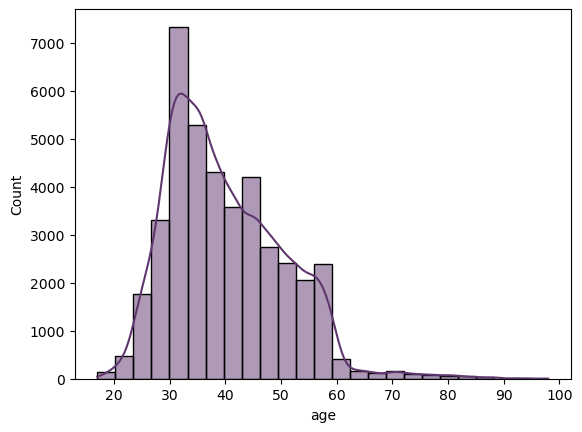

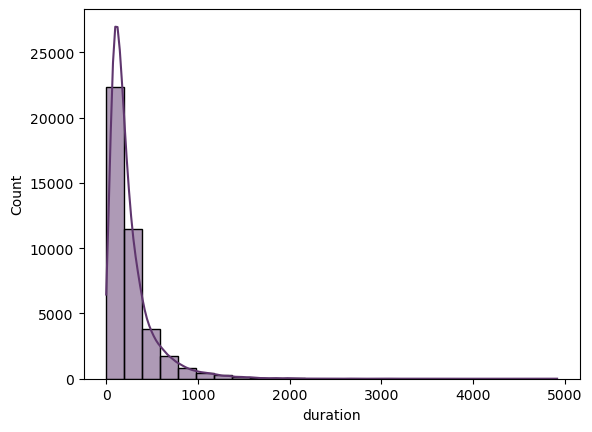

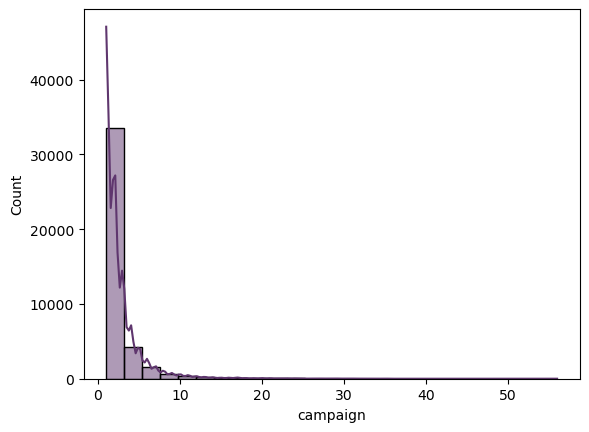

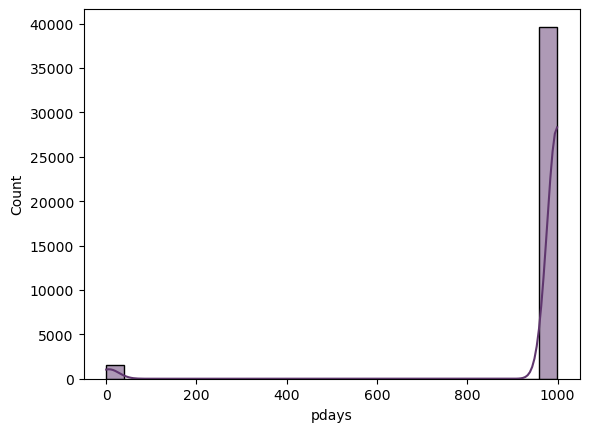

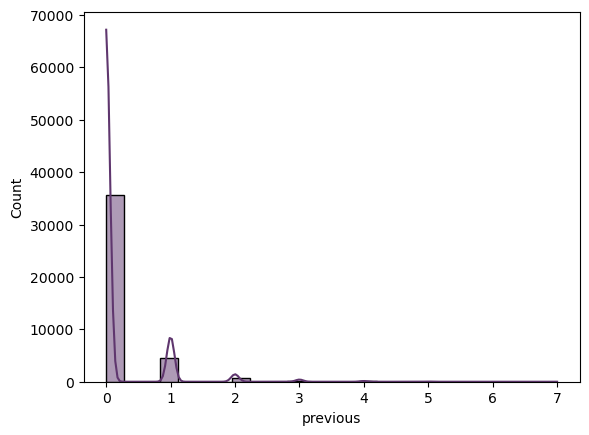

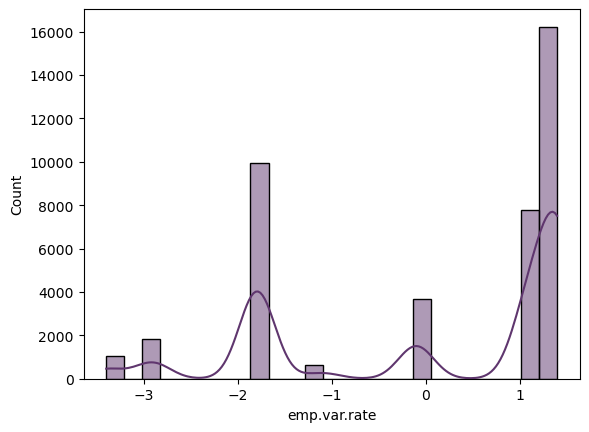

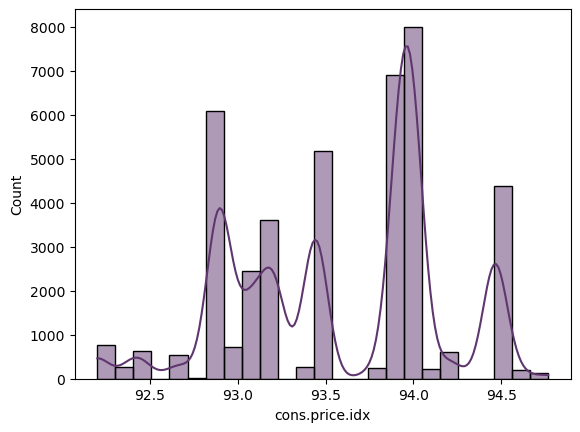

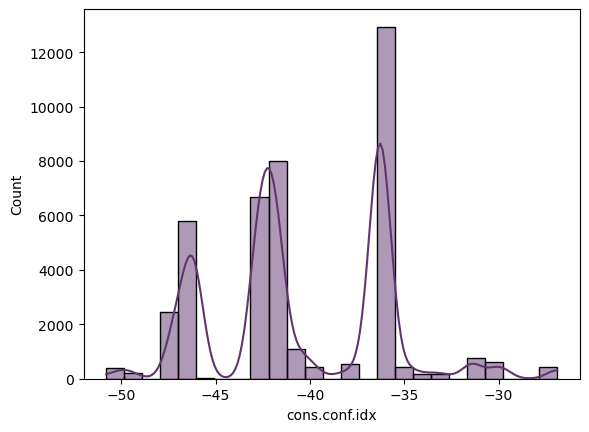

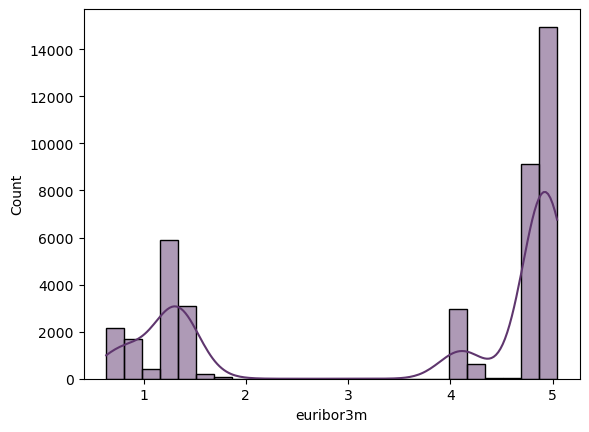

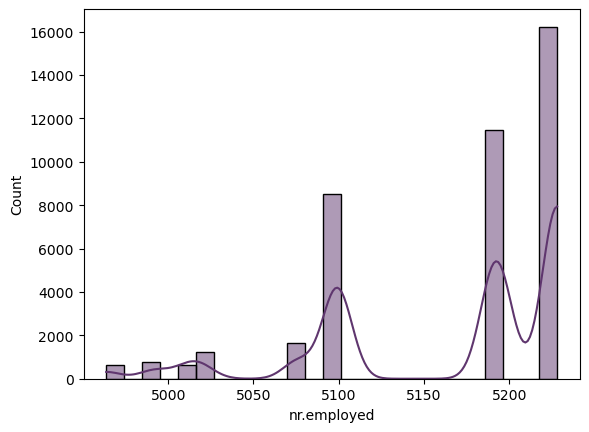

In [53]:
for feature in df_num:
    sns.histplot(x=feature,data=df,bins=25,kde=True,color='#5f366e')
    plt.show()

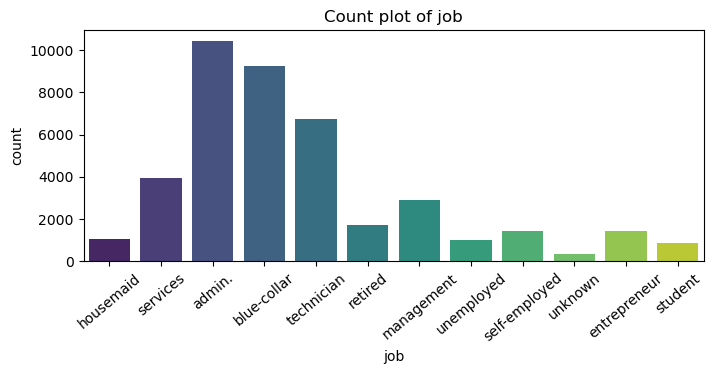

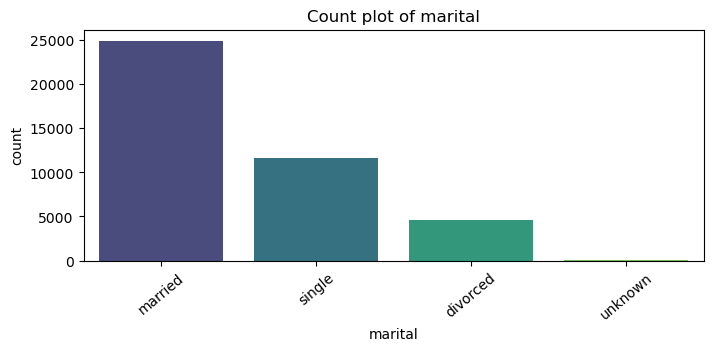

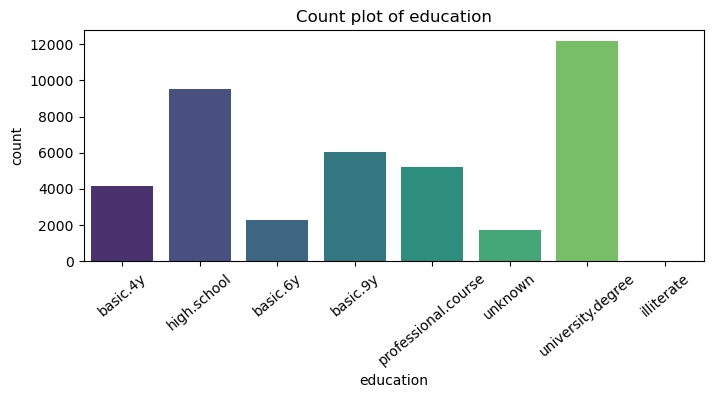

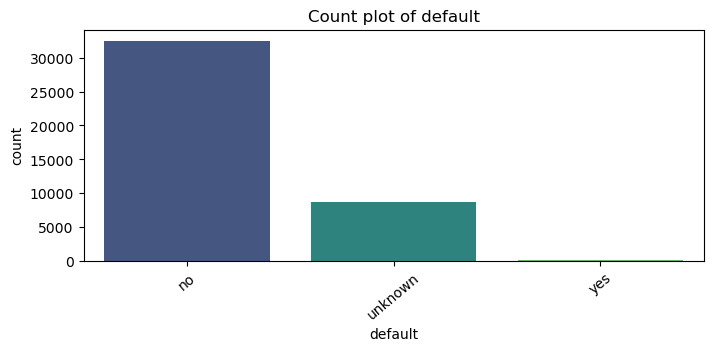

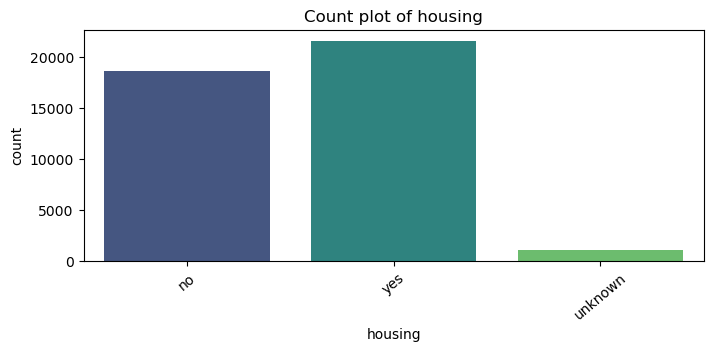

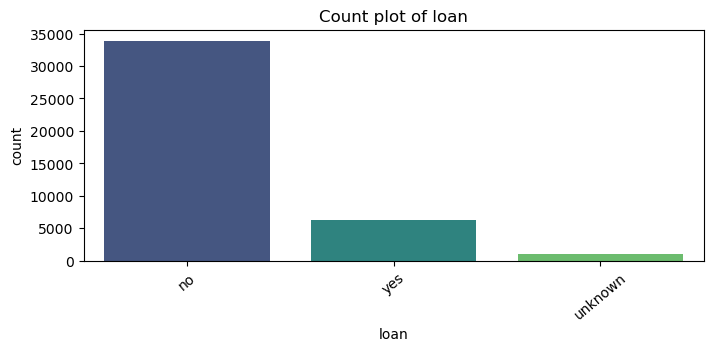

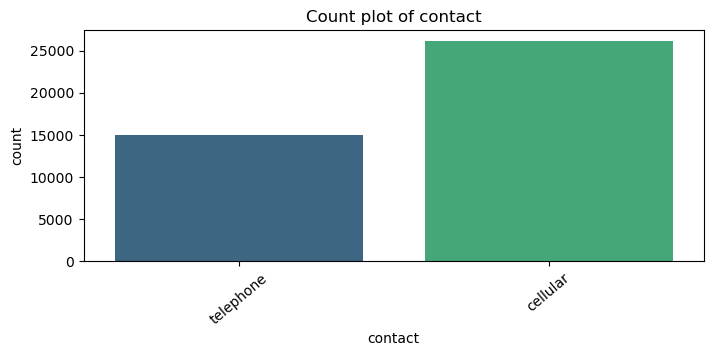

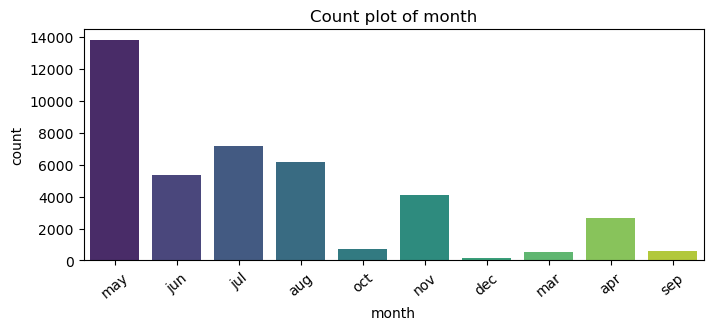

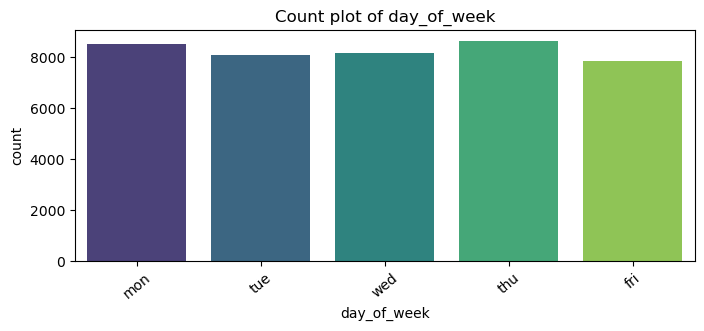

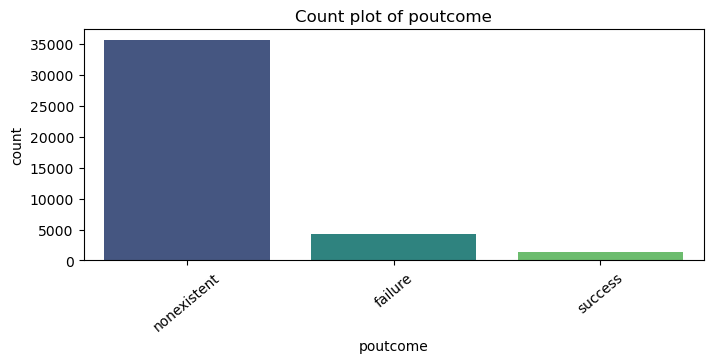

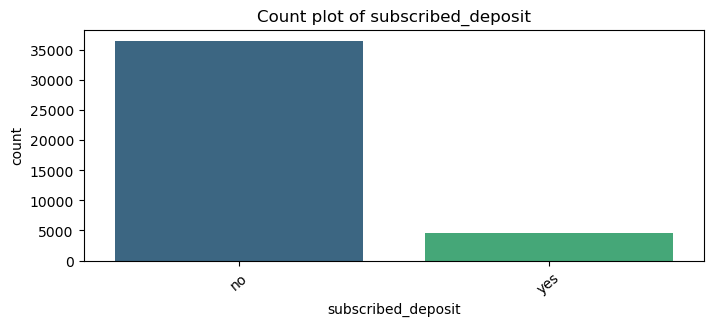

In [55]:
for feature in df_obj:
    plt.figure(figsize=(8,3))
    plt.title(f"Count plot of {feature}")
    sns.countplot(x=feature,data=df,palette='viridis')
    plt.xticks(rotation=40)
    plt.show()

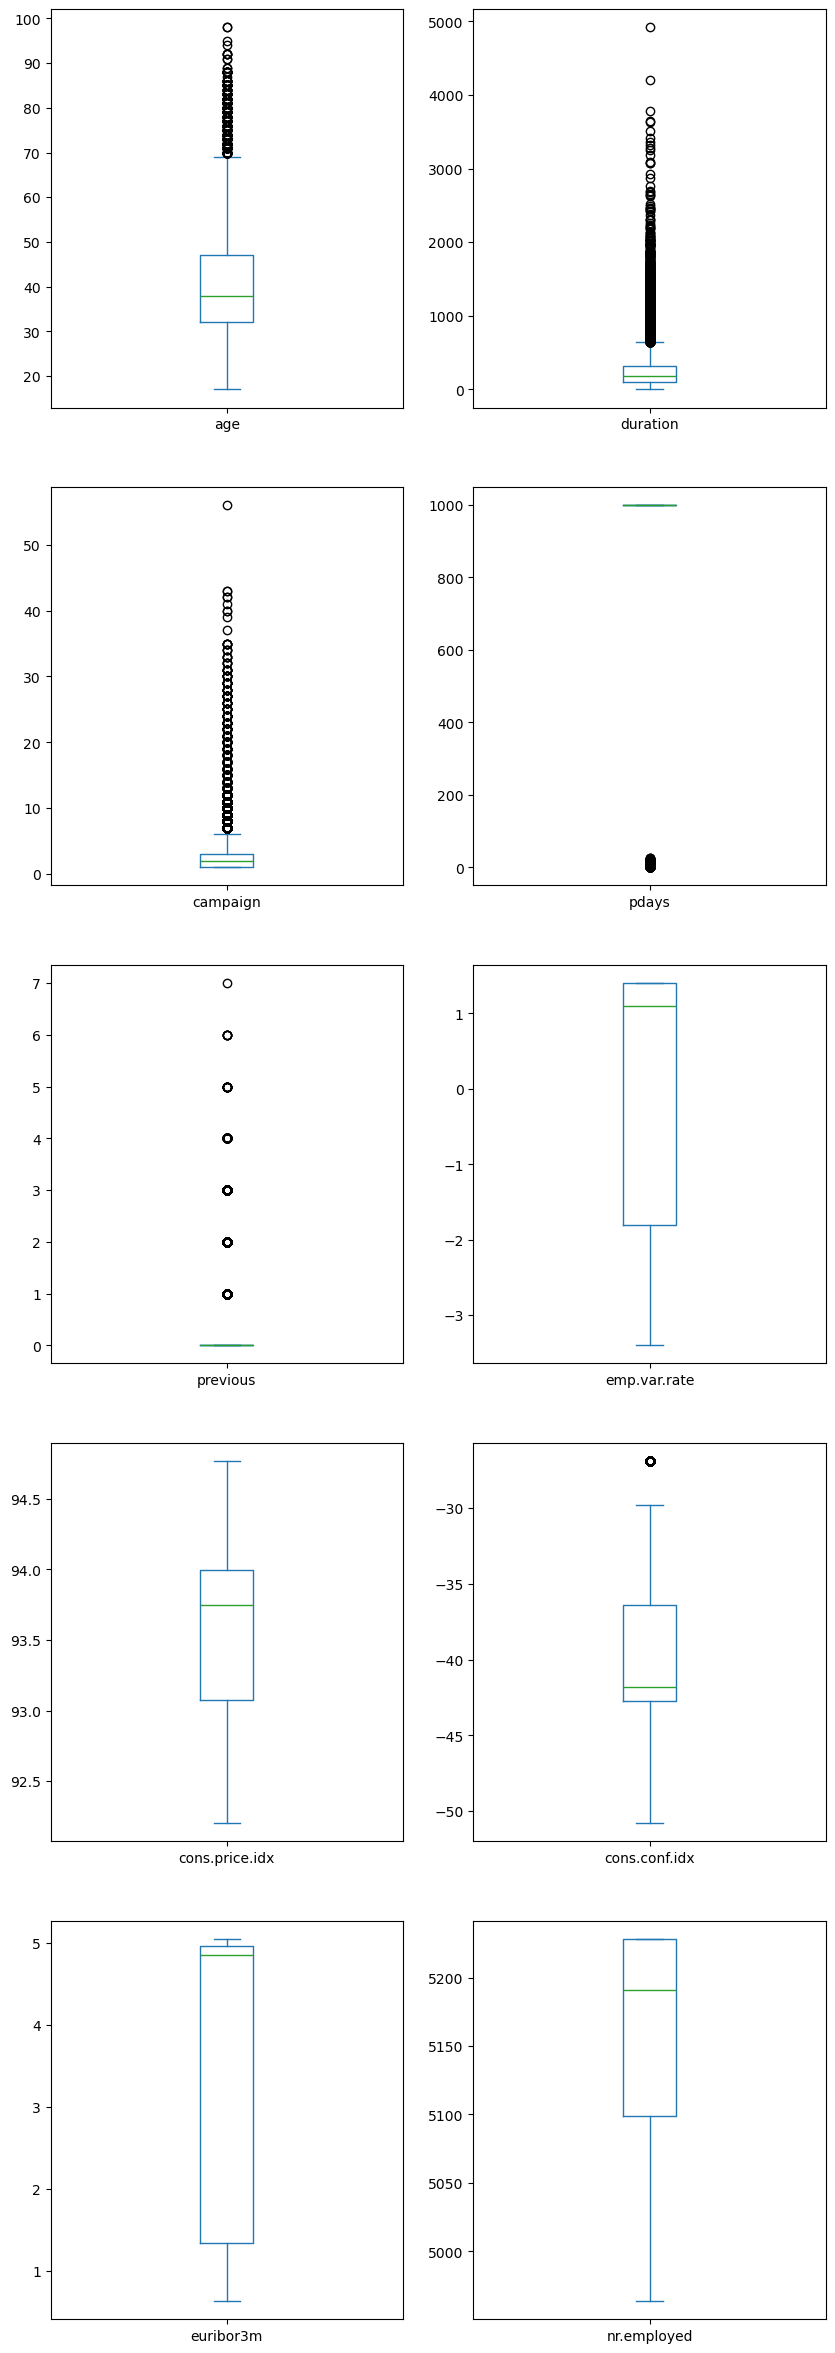

In [57]:
df.plot(kind='box', subplots=True, layout=(5,2), figsize=(10,30))
plt.show()

In [59]:
columns = ['age', 'campaign', 'duration']

for column in columns:
    q1 = np.percentile(df[column], 25)
    q3 = np.percentile(df[column], 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    # Filter the DataFrame for the current column
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

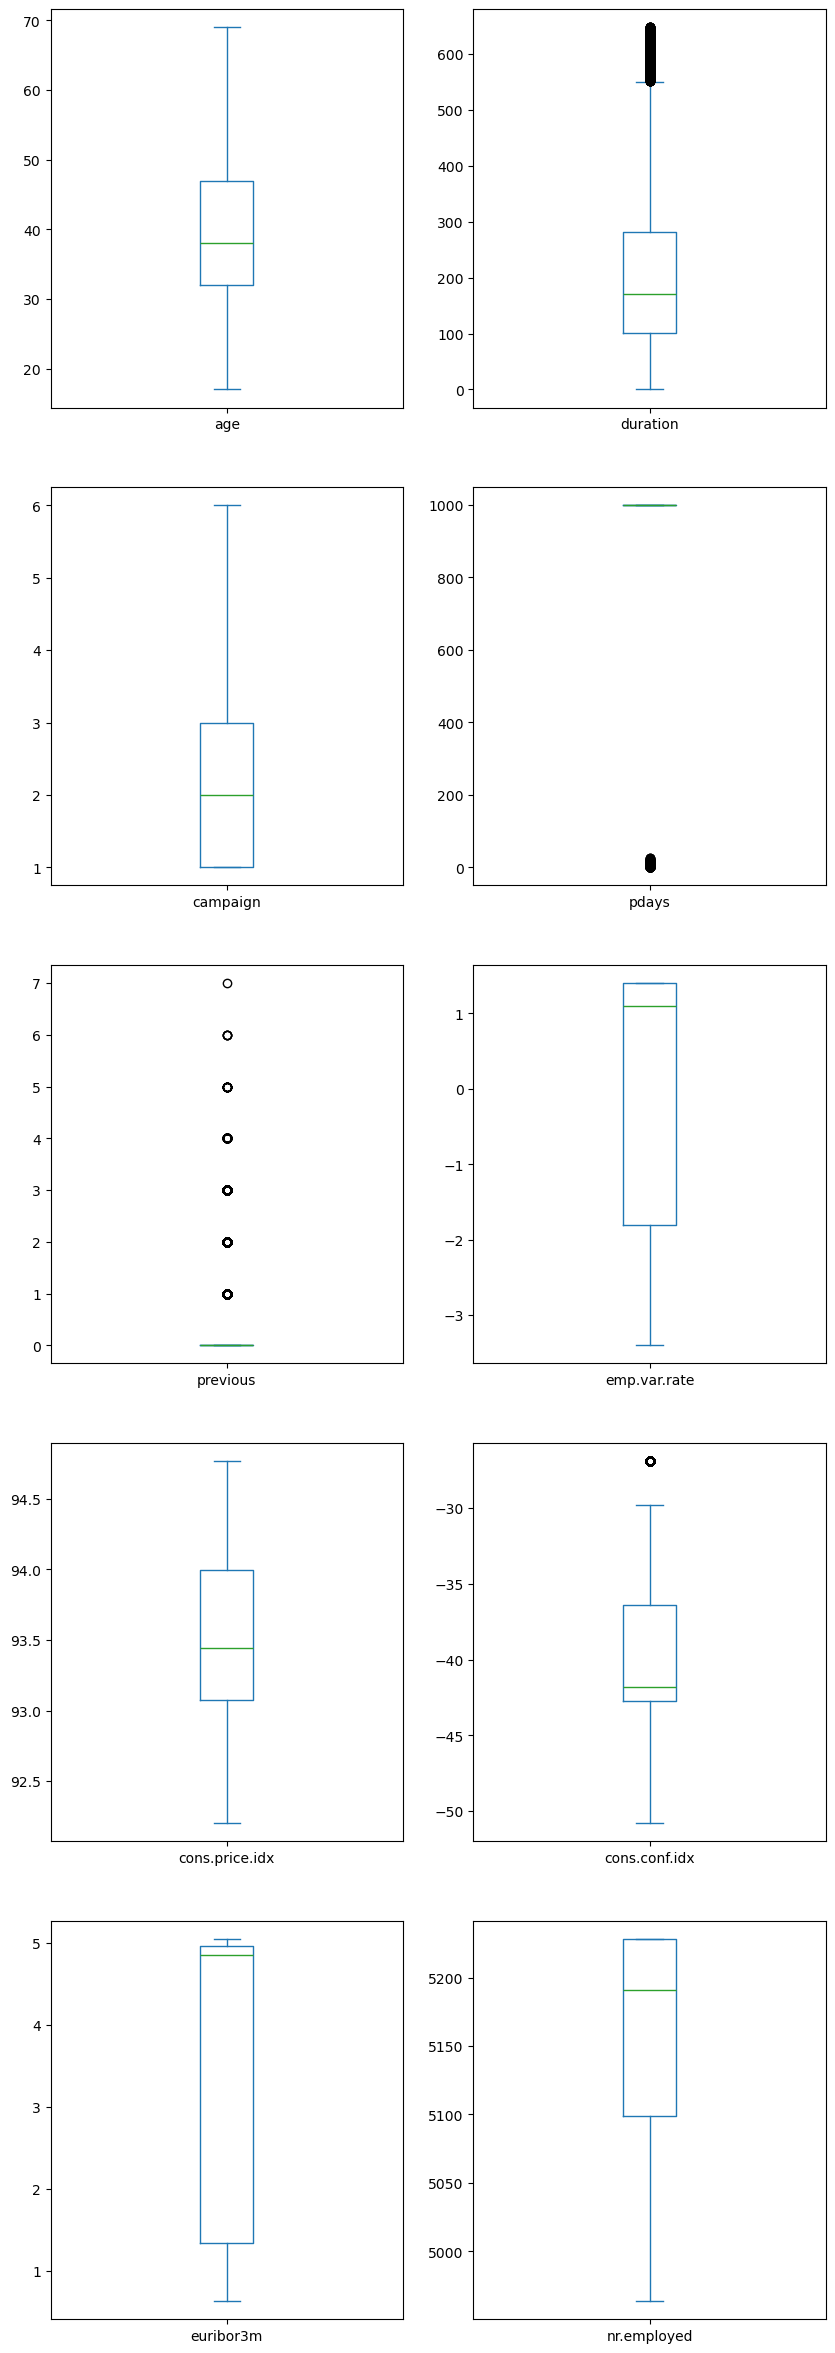

In [61]:
df.plot(kind='box', subplots=True, layout=(5,2), figsize=(10,30))
plt.show()

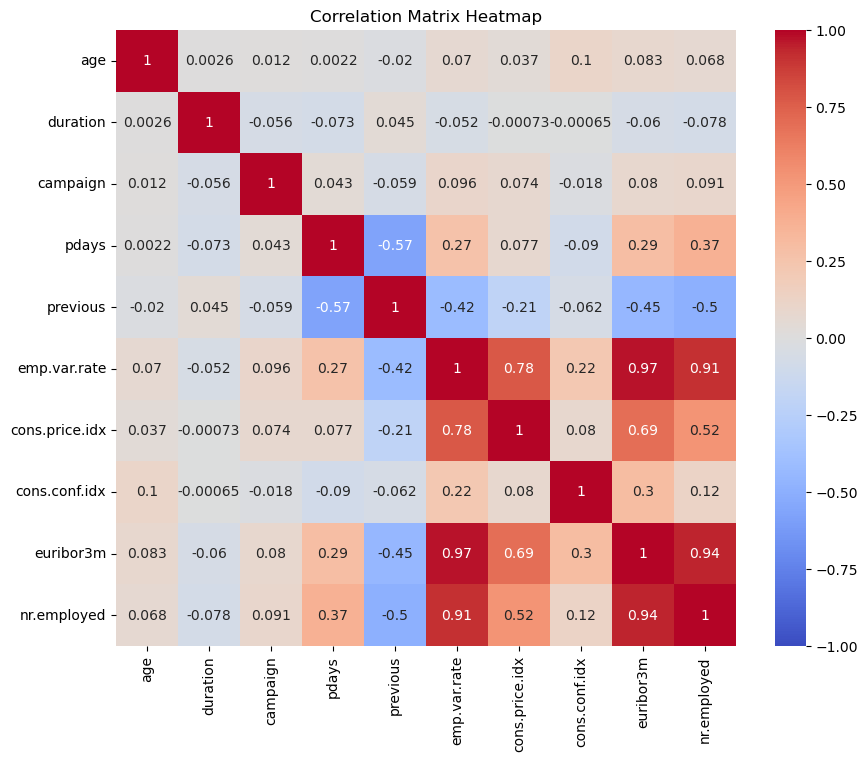

In [63]:
# Select only the numerical columns
numerical_df = df.select_dtypes(include=[np.number])

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [65]:
high_corr_cols = ['emp.var.rate','euribor3m','nr.employed']

In [67]:
# copy the original dataframe

df1=df.copy()

# Removing high correlated columns from the dataset
df1.drop(high_corr_cols, inplace=True, axis=1)
df1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'cons.price.idx', 'cons.conf.idx',
       'subscribed_deposit'],
      dtype='object')

In [69]:
df1.shape

(35550, 18)

In [71]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_encoded = df1.apply(le.fit_transform)
df_encoded

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,subscribed_deposit
0,39,3,1,0,0,0,0,1,6,1,261,0,26,0,1,18,16,0
1,40,7,1,3,1,0,0,1,6,1,149,0,26,0,1,18,16,0
2,20,7,1,3,0,2,0,1,6,1,226,0,26,0,1,18,16,0
3,23,0,1,1,0,0,0,1,6,1,151,0,26,0,1,18,16,0
4,39,7,1,3,0,0,2,1,6,1,307,0,26,0,1,18,16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,20,0,1,6,0,2,0,0,7,0,281,0,26,0,1,25,0,1
41182,12,10,2,0,0,2,0,0,7,0,112,0,9,1,2,25,0,0
41184,29,1,1,5,0,0,0,0,7,0,383,0,26,0,1,25,0,0
41185,39,5,1,6,0,2,0,0,7,0,189,1,26,0,1,25,0,0


In [73]:
df_encoded['subscribed_deposit'].value_counts(normalize=True)*100

subscribed_deposit
0    91.887482
1     8.112518
Name: proportion, dtype: float64

In [75]:
## independent variables
x = df_encoded.iloc[:,:-1]   

## Target variable
y = df_encoded.iloc[:,-1]     
x.shape

(35550, 17)

In [77]:
y.shape

(35550,)

In [79]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(24885, 17)
(10665, 17)
(24885,)
(10665,)


In [81]:
from sklearn.tree import DecisionTreeClassifier

In [83]:
dc = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=10)
dc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10)

In [85]:
print("Training accuracy:",dc.score(x_train,y_train))
print("Testing accuracy:",dc.score(x_test,y_test))

Training accuracy: 0.9369901547116737
Testing accuracy: 0.93314580403188


In [87]:
y_pred=dc.predict(x_test)

In [89]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(accuracy_score(y_test,y_pred))

0.93314580403188


In [91]:
print(confusion_matrix(y_test,y_pred))

[[9599  214]
 [ 499  353]]


In [93]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      9813
           1       0.62      0.41      0.50       852

    accuracy                           0.93     10665
   macro avg       0.79      0.70      0.73     10665
weighted avg       0.92      0.93      0.93     10665



In [95]:
from sklearn.tree import plot_tree

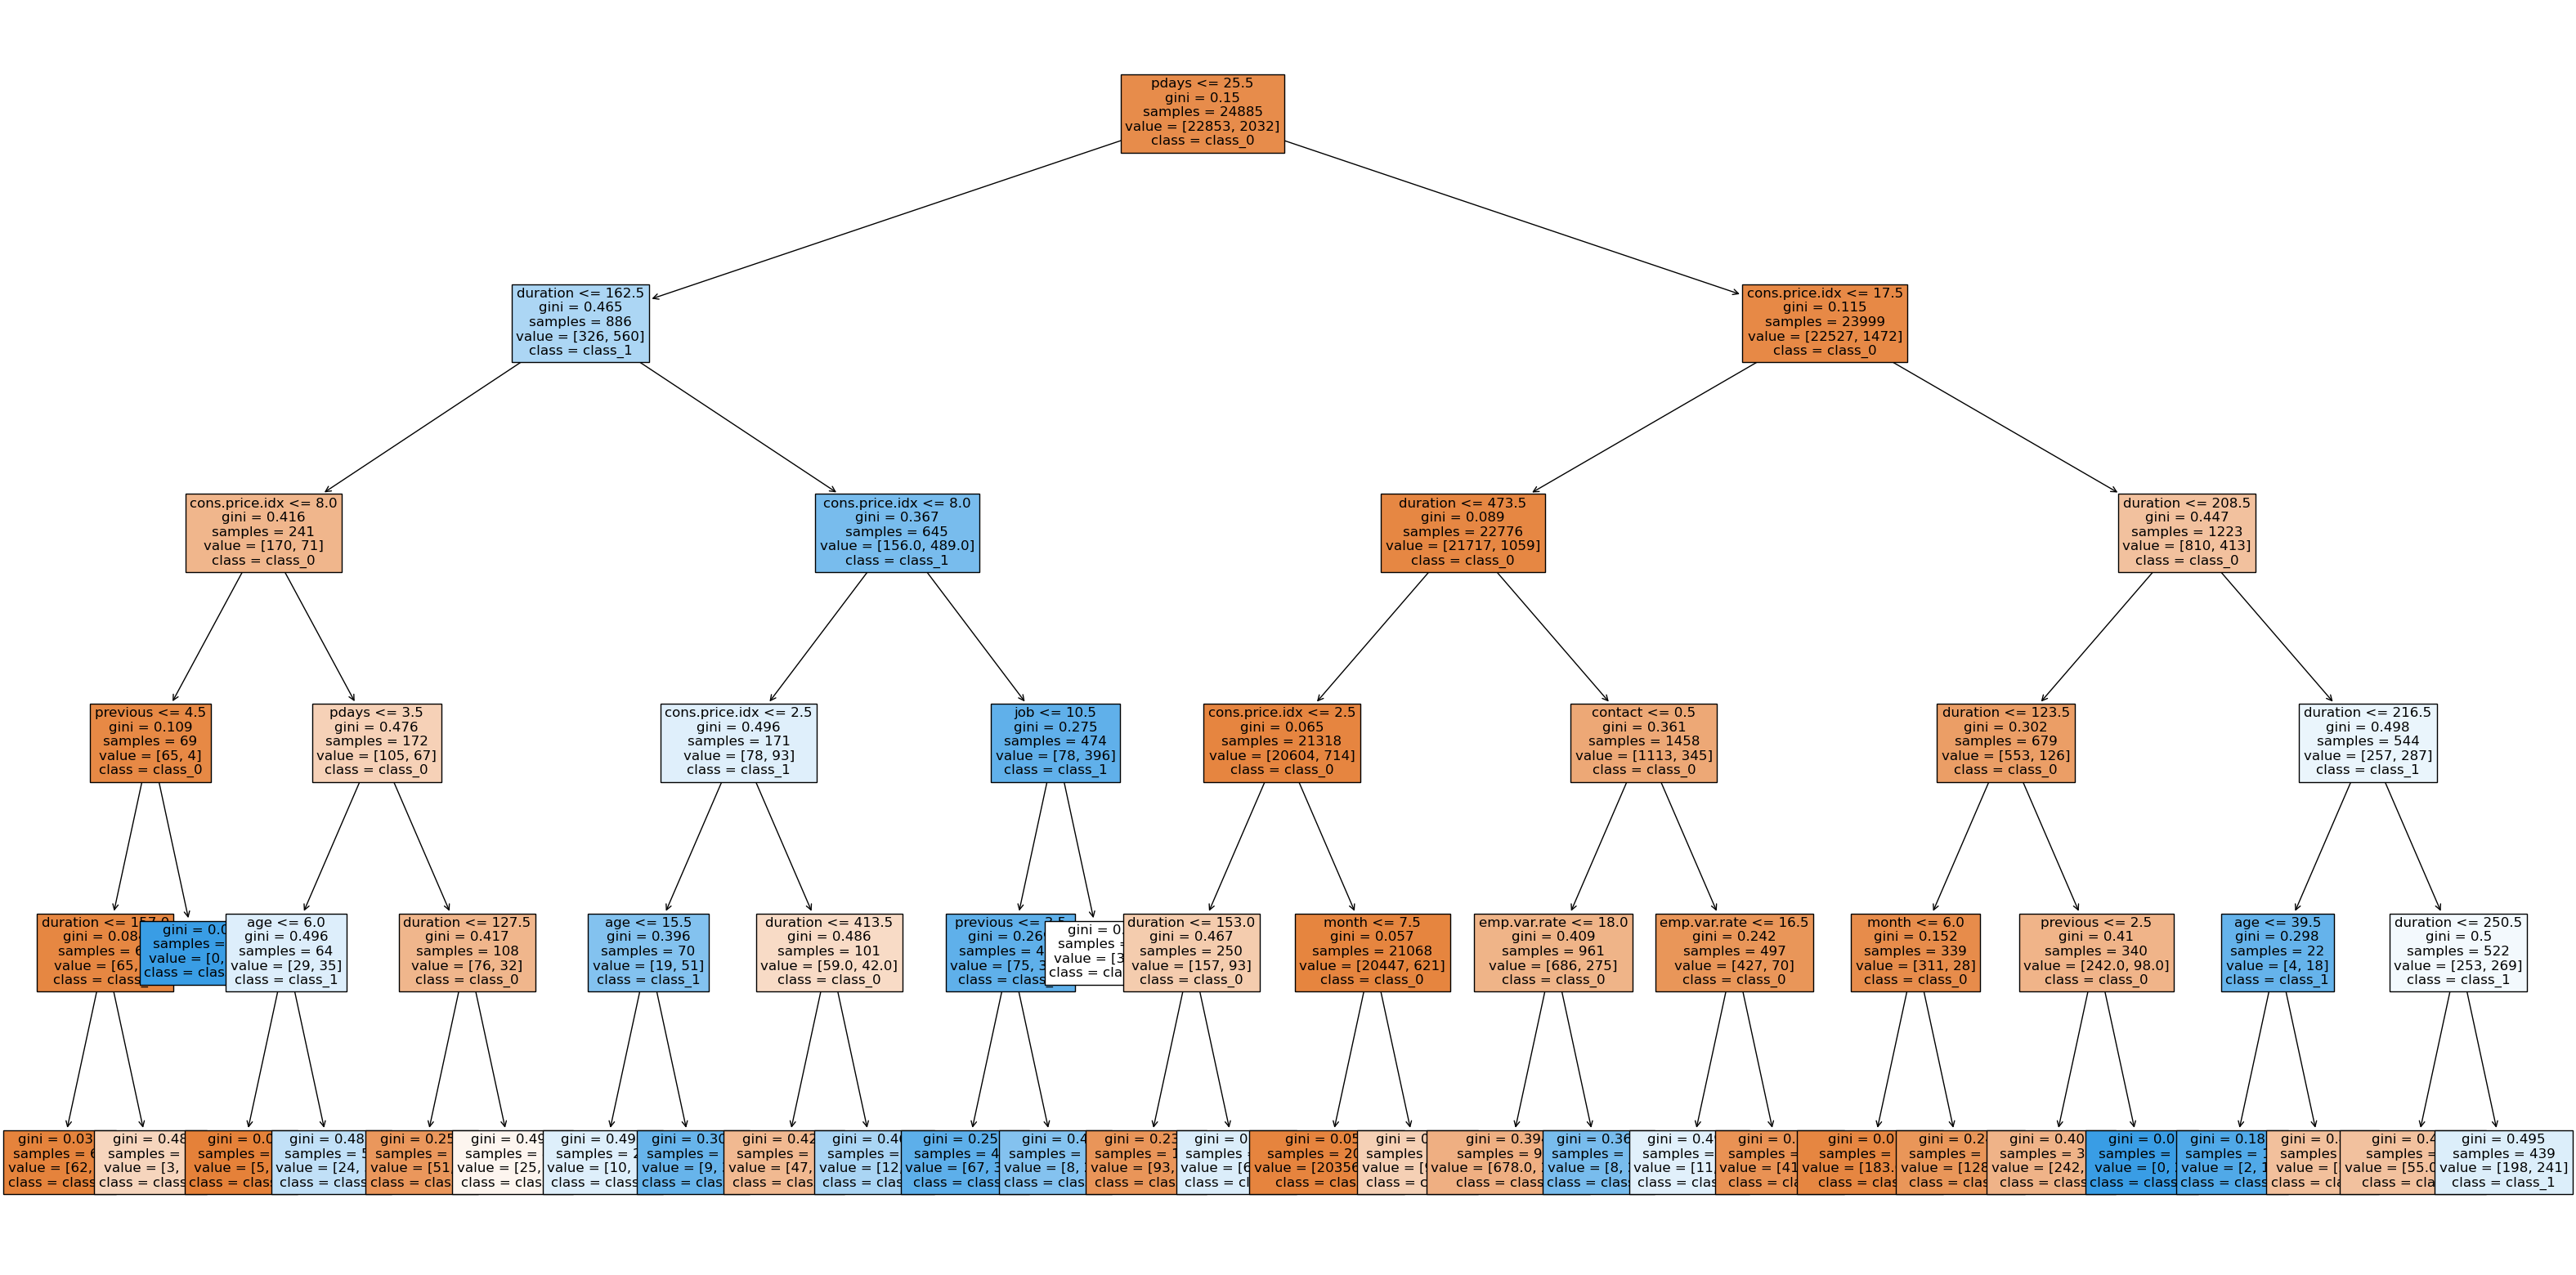

In [97]:
feature_names=df.columns.tolist()
plt.figure(figsize=(40,20))
class_names=["class_0","class_1"]
plot_tree(dc, feature_names=feature_names, class_names=class_names, filled=True,fontsize=12)
plt.show()

In [99]:
dc1=DecisionTreeClassifier(criterion='entropy',max_depth=5,min_samples_split=10)
dc1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=10)

In [101]:
print("Training accuracy:",dc1.score(x_train,y_train))
print("Testing accuracy:",dc1.score(x_test,y_test))

Training accuracy: 0.9359855334538879
Testing accuracy: 0.9316455696202531


In [103]:
y1_pred=dc1.predict(x_test)

In [105]:
print(accuracy_score(y_test,y1_pred))

0.9316455696202531


In [107]:
print(confusion_matrix(y_test,y1_pred))

[[9654  159]
 [ 570  282]]


In [109]:
print(classification_report(y_test,y1_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      9813
           1       0.64      0.33      0.44       852

    accuracy                           0.93     10665
   macro avg       0.79      0.66      0.70     10665
weighted avg       0.92      0.93      0.92     10665



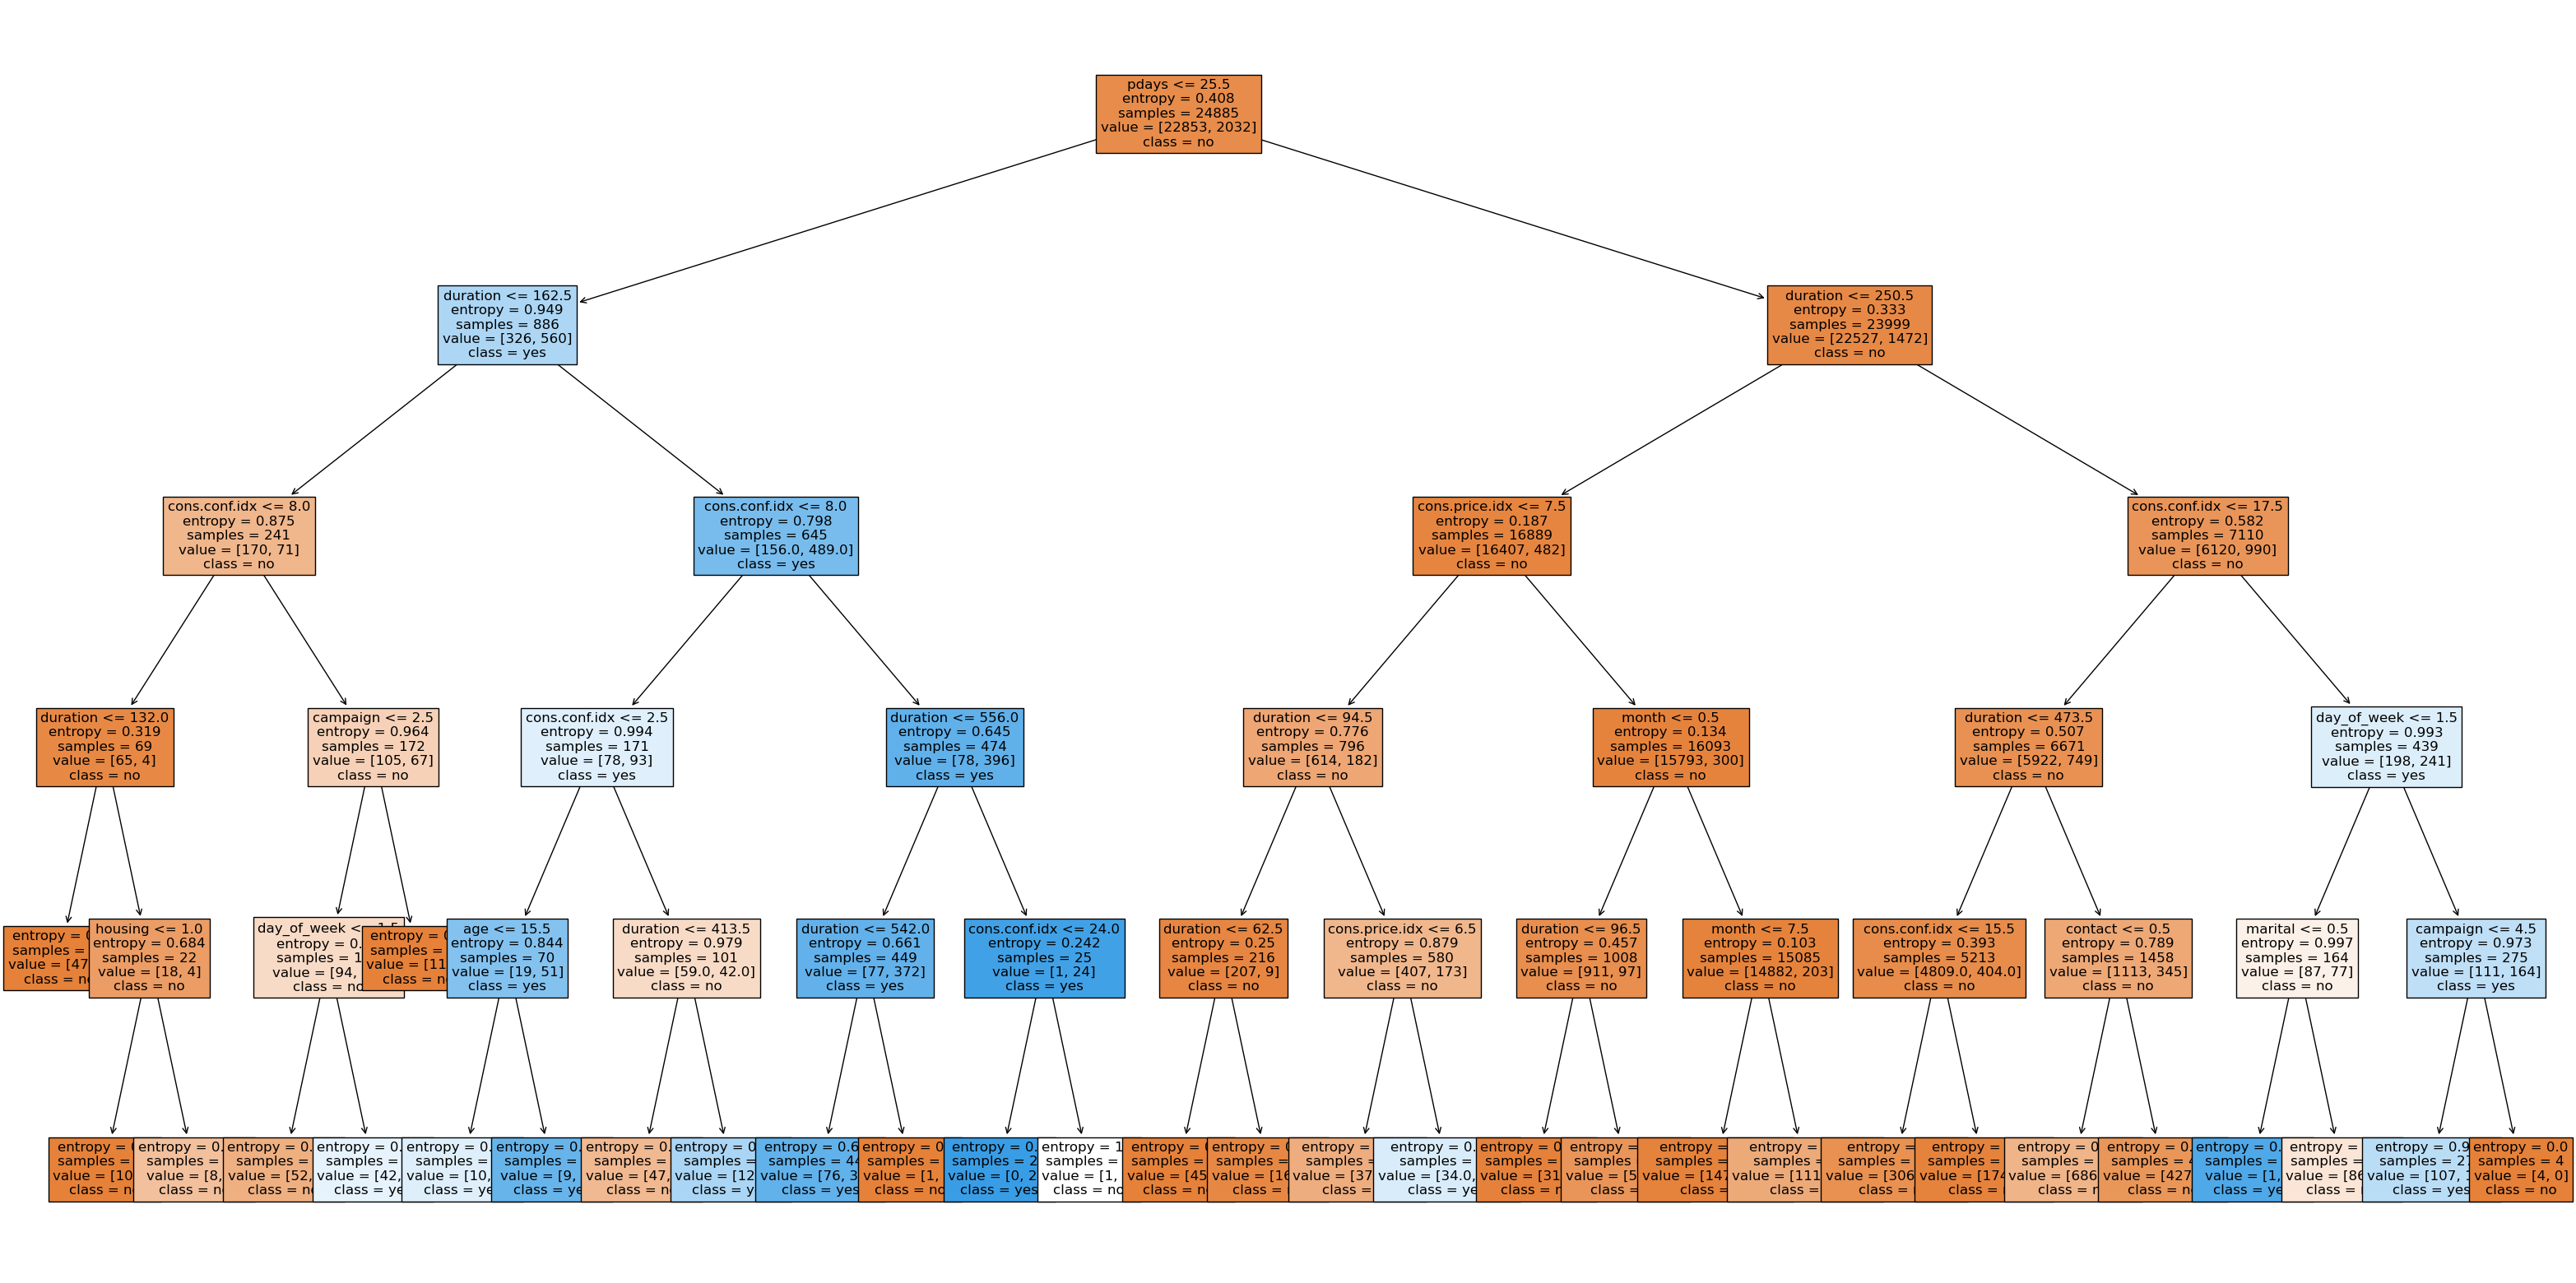

In [111]:
cn=['no','yes']
fn=x_train.columns
plt.figure(figsize=(40,20))
plot_tree(dc1, feature_names=fn.tolist(), class_names=cn, filled=True,fontsize=12)
plt.show()